# Exercise: Complete Modeling Workflow (With Answers)

**Download: ``http://shorturl.at/crOS2/Lecture_12``**

File obsdata.csv contains four columns, each with 20 points. The columns are: time, A, B, C. 
1. Evaluate each of the following models using cross validation to find which provides the best fit.

    Model 1:

        A -> B

        B -> C


    Model 2:

         A -> B

         A -> C

    Model 3:

         A + B -> C

    All kinetics are mass action. A is starts at 5M, and all other concentrations are 0.
    Kinetics constants are in [0, 10]
    
    a. Write the full Antimony models for each of the above.
    
    b. What simulation time should you use? How many points?
    
    c. Do cross validation on each. Which has the largest $R^2$ across folds?
    
    d. Did some folds in cross validation produce much better fits than others? Why?

2. Construct a 95% confidence interval for the model with the best fit.

3. The "observational data" were generated by a model that contains a chemical species D that is not present in the other models. How might we detect that there is a missing chemical species?

Hint: You can read data in a CSV file into a numpy array using ``np.genfromtxt("obsdata.csv", delimiter=",", skip_header=True)``.

## Checkpoints
1. Antimony models. Insert kinetics and constant initializations.
1. Plot observational data, identifying time periods over which fitting is done.
1. Cross validation results
   1. Model 1
   1. Model 2
   1. Model 3
1. Choice for "best model"
1. Parameter estimates and evaluation.

In [1]:
%matplotlib inline
import numpy as np
import model_fitting as mf

In [2]:
# Globals
num_points = 30
sim_time = 30

## Full model

In [3]:
# Model used in this example
model0 = """
     # True model
     A  -> B; k1*A
     A + B -> D; k2*A*B
     D -> C; k3*D
      
     A = 5;
     B = 0;
     C = 0;
     D = 0;
     k1 = 0.5
     k2 = 0.2
     k3 = 0.1
"""
unfitted_parameters = mf.makeParameters(constants=['k1', 'k2', 'k3'])
unfitted_parameters

name,value,initial value,min,max,vary
k1,1.00000000,1,0.00000000,10.0000000,True
k2,1.00000000,1,0.00000000,10.0000000,True
k3,1.00000000,1,0.00000000,10.0000000,True


In [4]:
noise_std = 0.2
full_obs_data = mf.makeObservations(model=model0, noise_std=noise_std, num_points=num_points, sim_time=sim_time)
obs_data = full_obs_data[:, [0, 1, 2,  4]]
obs_data

 [[       0,   4.92256,       0,         0],
  [ 1.03448,    2.6529, 1.46422,   0.25601],
  [ 2.06897,   1.37388,  1.3844, 0.0796014],
  [ 3.10345,  0.430366, 1.74216,  0.149161],
  [ 4.13793,  0.036673, 1.74768,  0.568907],
  [ 5.17241,  0.337952, 1.52215,  0.339256],
  [  6.2069,         0, 1.48913,  0.713054],
  [ 7.24138, 0.0687239, 2.08472,  0.525358],
  [ 8.27586,  0.139487,  1.9468,  0.528399],
  [ 9.31034,  0.225564, 2.05476,   1.05841],
  [ 10.3448,         0,   2.154,  0.765005],
  [ 11.3793,         0, 1.88162,   1.18321],
  [ 12.4138,   0.26127, 1.86249,   1.19896],
  [ 13.4483,  0.282106, 2.09582,   1.13936],
  [ 14.4828,  0.283955, 1.63284,   1.03555],
  [ 15.5172,         0, 1.85953,   1.53549],
  [ 16.5517,         0, 2.03024,    1.0264],
  [ 17.5862,  0.275883, 2.06395,   1.40362],
  [ 18.6207,         0,  1.7809,   1.25905],
  [ 19.6552, 0.0154197, 2.07033,   1.27515],
  [ 20.6897, 0.0418334, 2.26467,   1.38819],
  [ 21.7241,         0, 1.94237,   1.32678],
  [ 22.758

In [5]:
def writeCSV(data, filename="obsdata.csv"):
    import pandas as pd
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
writeCSV(obs_data)

In [6]:
obs_data = np.genfromtxt("obsdata.csv", delimiter=",", skip_header=True)
obs_data

array([[0.00000000e+00, 4.92256316e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03448276e+00, 2.65289732e+00, 1.46421988e+00, 2.56010266e-01],
       [2.06896552e+00, 1.37388296e+00, 1.38439825e+00, 7.96014411e-02],
       [3.10344828e+00, 4.30365778e-01, 1.74216243e+00, 1.49160784e-01],
       [4.13793103e+00, 3.66730049e-02, 1.74768456e+00, 5.68907173e-01],
       [5.17241379e+00, 3.37952132e-01, 1.52214520e+00, 3.39256099e-01],
       [6.20689655e+00, 0.00000000e+00, 1.48913494e+00, 7.13054314e-01],
       [7.24137931e+00, 6.87238894e-02, 2.08471632e+00, 5.25358093e-01],
       [8.27586207e+00, 1.39486850e-01, 1.94680458e+00, 5.28398965e-01],
       [9.31034483e+00, 2.25564443e-01, 2.05476210e+00, 1.05841439e+00],
       [1.03448276e+01, 0.00000000e+00, 2.15400114e+00, 7.65004933e-01],
       [1.13793103e+01, 0.00000000e+00, 1.88162159e+00, 1.18320739e+00],
       [1.24137931e+01, 2.61269634e-01, 1.86249437e+00, 1.19896388e+00],
       [1.34482759e+01, 2.82105850e-01, 2.09582130e

In [7]:
full_obs_data

       time,       [A],     [B],       [D],       [C]
 [[       0,   4.92256,       0,  0.154559,         0],
  [ 1.03448,    2.6529, 1.46422,  0.323359,   0.25601],
  [ 2.06897,   1.37388,  1.3844,   1.21101, 0.0796014],
  [ 3.10345,  0.430366, 1.74216,   1.26756,  0.149161],
  [ 4.13793,  0.036673, 1.74768,  0.816991,  0.568907],
  [ 5.17241,  0.337952, 1.52215,   1.12552,  0.339256],
  [  6.2069,         0, 1.48913,   0.81673,  0.713054],
  [ 7.24138, 0.0687239, 2.08472,  0.812617,  0.525358],
  [ 8.27586,  0.139487,  1.9468,  0.745763,  0.528399],
  [ 9.31034,  0.225564, 2.05476,   1.04712,   1.05841],
  [ 10.3448,         0,   2.154,  0.521331,  0.765005],
  [ 11.3793,         0, 1.88162,  0.560938,   1.18321],
  [ 12.4138,   0.26127, 1.86249,  0.510812,   1.19896],
  [ 13.4483,  0.282106, 2.09582,  0.348235,   1.13936],
  [ 14.4828,  0.283955, 1.63284,  0.415551,   1.03555],
  [ 15.5172,         0, 1.85953,   0.89718,   1.53549],
  [ 16.5517,         0, 2.03024,  0.347395,    1.0

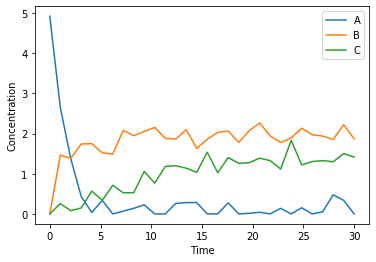

In [8]:
mf.plotTimeSeries(obs_data, columns=['A', 'B', 'C'])

## Candidate models

In [9]:
models = []
parameters_list = []
# Model used in this example
model = """
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)

model = """
     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1', 'k2']))
models.append(model)


model = """
     # Model 3
     A + B -> C; k1*A
      
     A = 2.5;
     B = 2.5;
     C = 0;
     k1 = 0
"""
parameters_list.append(mf.makeParameters(constants=['k1']))
models.append(model)

In [10]:
for model in models:
    print(model)


    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0


     # Model 2
     A -> B; k1*A
     A -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0


     # Model 3
     A + B -> C; k1*A
      
     A = 2.5;
     B = 2.5;
     C = 0;
     k1 = 0



## Model Analysis

In [11]:
# Evaluation using cross validation
for model, parameters in zip(models, parameters_list):
    print("\nModel: %s" % model)
    _, rsqs = mf.crossValidate(obs_data, model=model, parameters=parameters, 
                                         num_points=num_points, 
                                         method='leastsq',
                                         sim_time=sim_time,
                                         num_folds=3)
    print(rsqs)


Model: 
    # Model 1
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0
     k2 = 0



TypeError: Improper input: N=2 must not exceed M=0

In [ ]:
list_parameters, rsqs = mf.crossValidate(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points, method='leastsq',
                                         sim_time=sim_time,
                                         num_folds=3)
rsqs

In [ ]:
mf.doBootstrap(full_obs_data, model=model0, parameters=unfitted_parameters, 
                                         num_points=num_points, method='leastsq',
                                         sim_time=sim_time, count=5)

In [ ]:
mf.doBootstrap(obs_data, model=models[0], parameters=parameters_list[0], 
                                         num_points=num_points,
                                         sim_time=sim_time, count=5)